In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('datasets/obesity/obesity.csv')

In [4]:
# general info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [16]:
# check missing values once again
print(data.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [10]:
# get unique values of categorical data
print("Gender:\t", data['Gender'].unique())
print("FHWO:\t", data['family_history_with_overweight'].unique())
print("FAVC:\t", data['FAVC'].unique())
print("CAEC:\t", data['CAEC'].unique())
print("SMOKE:\t", data['SMOKE'].unique())
print("SCC:\t", data['SCC'].unique())
print("CALC:\t", data['CALC'].unique())
print("MTRANS:\t", data['MTRANS'].unique())
print("NObeyesdad:\t", data['NObeyesdad'].unique())

Gender:	 ['Female' 'Male']
FHWO:	 ['yes' 'no']
FAVC:	 ['no' 'yes']
CAEC:	 ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE:	 ['no' 'yes']
SCC:	 ['no' 'yes']
CALC:	 ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS:	 ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad:	 ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [12]:
# Converting categorical data into numeric data
gender_map = {'Female': 0, 'Male': 1}
FHWO_map = {'no': 0, 'yes': 1}
FAVC_map = {'no': 0, 'yes': 1}
CAEC_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
SMOKE_map = {'no': 0, 'yes': 1}
SCC_map = {'no': 0, 'yes': 1}
CALC_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
MTRANS_map = {'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Automobile': 3, 'Public_Transportation': 4}
NObeyesdad_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4,'Obesity_Type_II': 5,'Obesity_Type_III': 6}

data['Gender'] = data['Gender'].map(gender_map)
data['family_history_with_overweight'] = data['family_history_with_overweight'].map(FHWO_map)
data['FAVC'] = data['FAVC'].map(FAVC_map)
data['CAEC'] = data['CAEC'].map(CAEC_map)
data['SMOKE'] = data['SMOKE'].map(SMOKE_map)
data['SCC'] = data['SCC'].map(SCC_map)
data['CALC'] = data['CALC'].map(CALC_map)
data['MTRANS'] = data['MTRANS'].map(MTRANS_map)
data['NObeyesdad'] = data['NObeyesdad'].map(NObeyesdad_map)

In [14]:
# check the data after changes
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,4,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,4,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,4,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,4,3


In [15]:
# get statistical summary
print(data.describe())

            Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921    24.312600     1.701677    86.586058   
std       0.500083     6.345968     0.093305    26.191172   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.947192     1.630000    65.473343   
50%       1.000000    22.777890     1.700499    83.000000   
75%       1.000000    26.000000     1.768464   107.430682   
max       1.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.817622     0.883941     2.419043     2.685628   
std                          0.386247     0.320371     0.533927     0.778039   
min                          0.000000     0.000000     1.000000     1.000000   
25%                          1.000000     1.000000

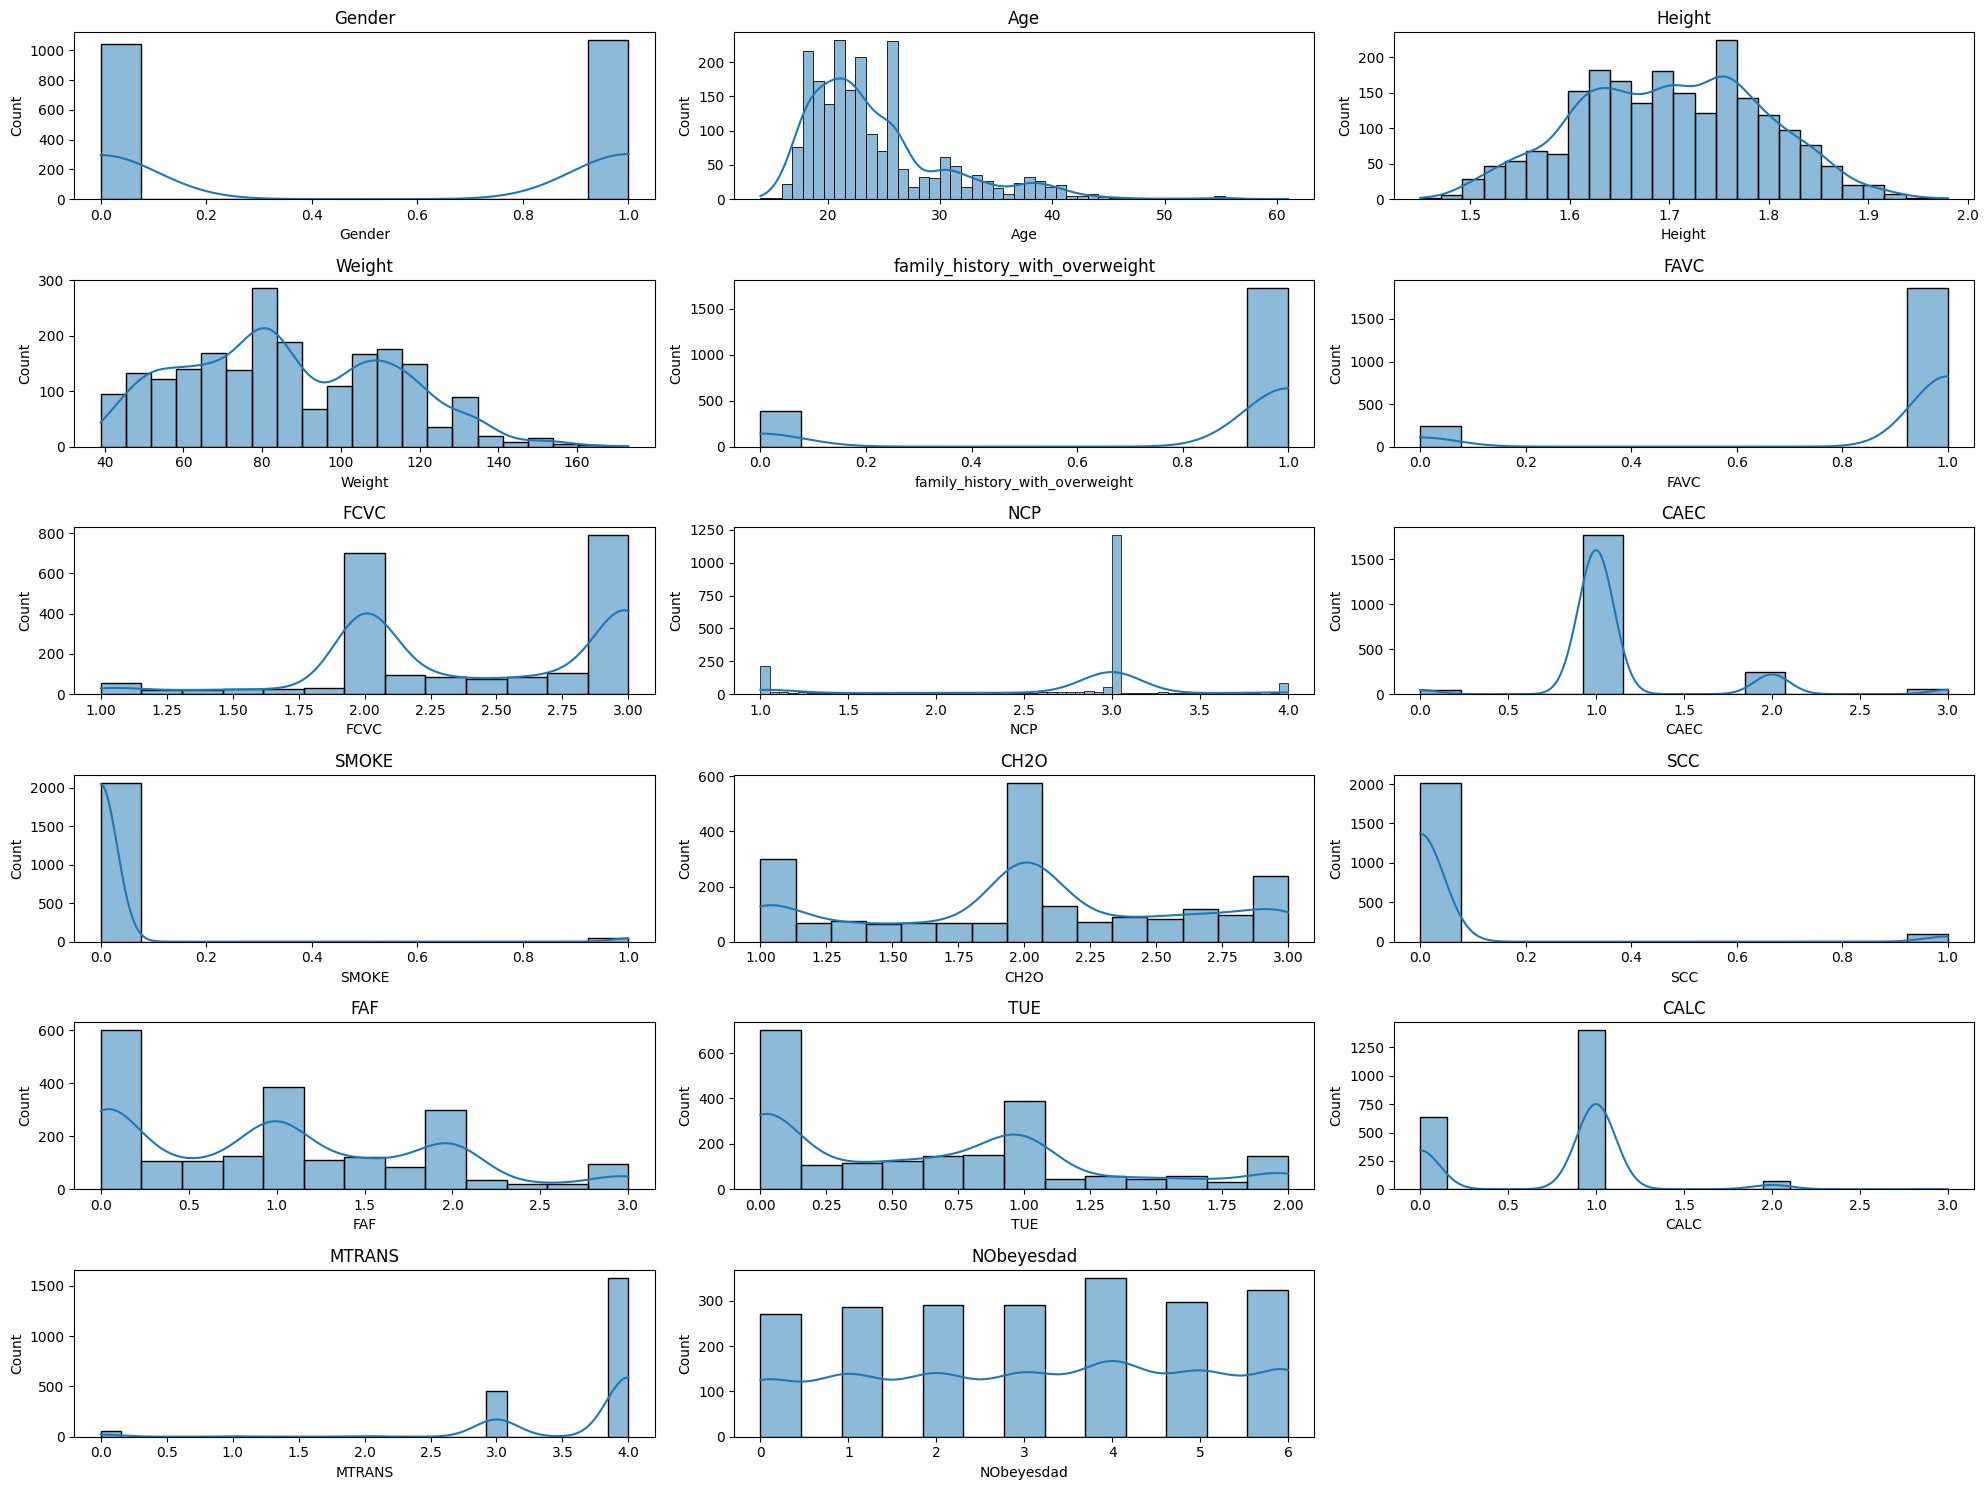

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of subplots
ncols = 3
nrows = int(len(data.select_dtypes(include=['float64', 'int64']).columns) / ncols) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
axes = axes.flatten()

# Iterate over numerical columns and plot distributions
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    sns.histplot(data[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Remove any unused subplots
for ax in axes[i+1:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

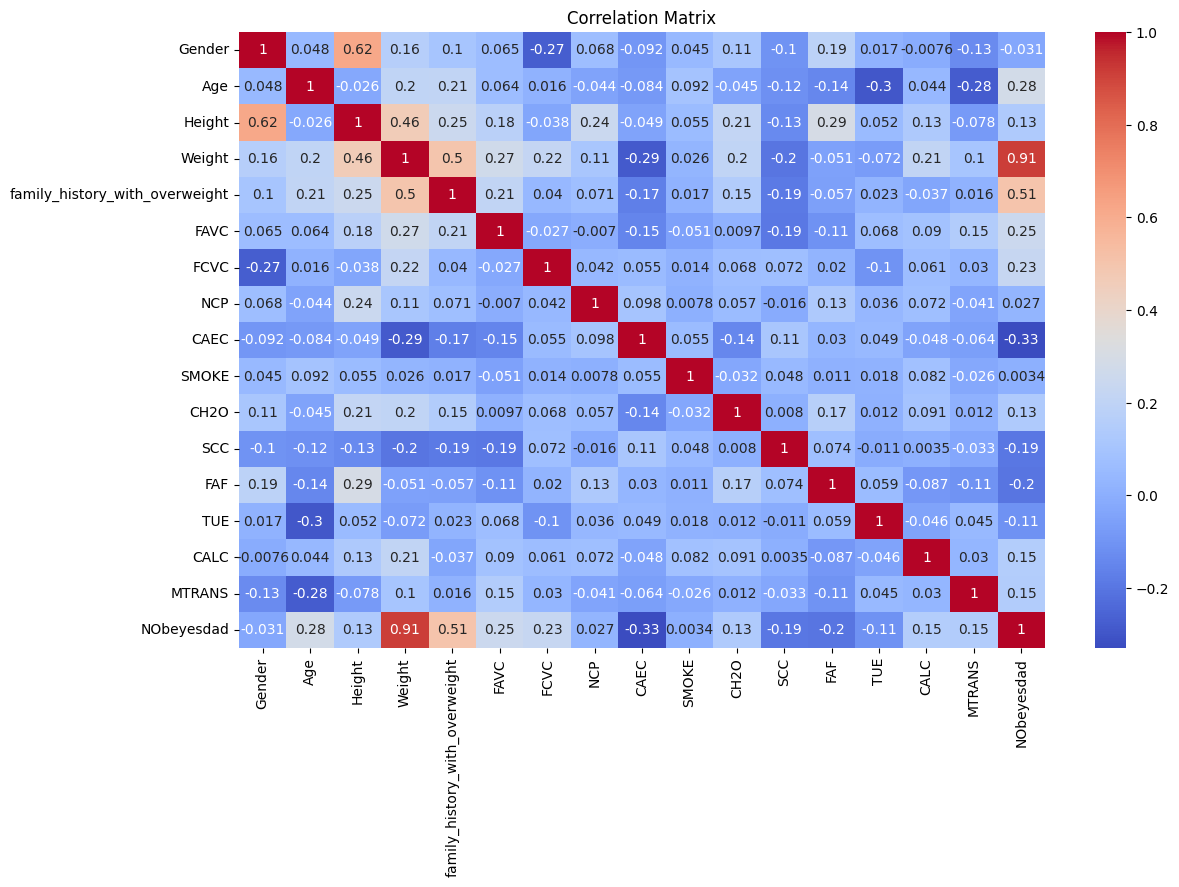

In [22]:
# correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(13, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()